<a href="https://colab.research.google.com/github/tams2005/Netflix-EDA/blob/main/TamalikaProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![Netflix Logo](https://upload.wikimedia.org/wikipedia/commons/0/08/Netflix_2015_logo.svg)



# **EDA on Netflix Movies & TV Shows Dataset**



*This Netflix Exploratory Data Analysis (EDA) project aims to uncover meaningful insights from the platform’s extensive catalog of movies and TV shows. By cleaning and analyzing the dataset, the project explores content trends over time, popular genres, rating distributions, and country-wise availability. Through detailed visualization and data interpretation, the analysis sheds light on Netflix’s content strategy and user experience, providing a clear understanding of how titles are distributed across different regions and audience segments. This groundwork not only reveals patterns in Netflix’s offerings but also prepares the data for potential machine learning applications such as recommendation systems and personalized content delivery.*



![Dancing GIF](https://www.bing.com/th/id/OGC.bb74046420c4c992b8cabc6e667abe40?o=7&cb=ucfimg2&pid=1.7&rm=3&rurl=https%3a%2f%2fc.tenor.com%2fQJNoPeq9WmUAAAAC%2fnetflix-intro-netflix.gif&ehk=IyGS8yCVbBipaUGTPBZgwsRJdyIcdwyMrdpgIZKjaVc%3d&ucfimg=1)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/netflix_titles_2021.csv.zip')

In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.fillna({'country': 'Unknown', 'rating': 'Unrated', 'listed_in': 'Unknown'}, inplace=True)

In [41]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['year_added'] = df['date_added'].dt.year

In [ ]:
df['listed_in_list'] = df['listed_in'].str.split(',')
df['country_list'] = df['country'].str.split(',')

/tmp/ipython-input-2739471879.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='year_added', palette='Set2')


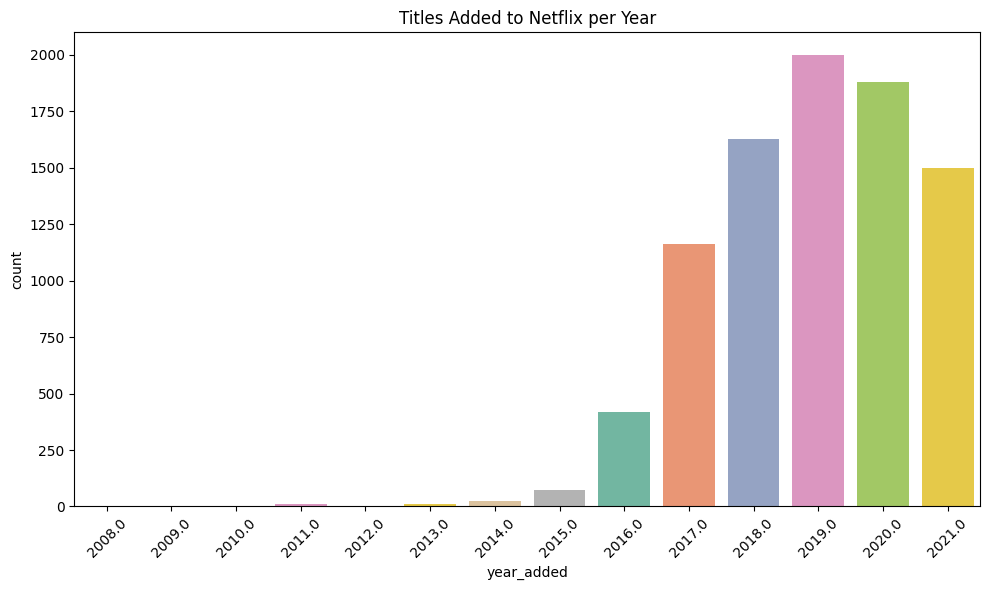

In [ ]:
# Number of Titles added to Netflix per Year

plt.figure(figsize=(10,6))
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['year_added'] = df['date_added'].dt.year
sns.countplot(data=df, x='year_added', palette='Set2')
plt.title('Titles Added to Netflix per Year')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The year-wise count of new titles added, showing the pace at which Netflix has expanded its catalog—this typically reveals significant increases in recent years indicating strategic content acquisitions or productions.

In [ ]:
# What is the best month for releasing content?
rating_map = {
    'TV-Y': 1, 'TV-Y7': 1, 'TV-Y7-FV': 1, 'TV-G': 1, 'G': 1,
    'PG': 2, 'TV-PG': 2,
    'TV-14': 3, 'PG-13': 3,
    'R': 4, 'NC-17': 4, 'TV-MA': 4,
    'Unrated': 0
}
df['encoded_rating'] = df['rating'].map(rating_map).fillna(0)

df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['month_added'] = df['date_added'].dt.month

avg_ratings_by_month = df.groupby('month_added')['encoded_rating'].mean()

best_month_num = avg_ratings_by_month.idxmax()
best_month_name = avg_ratings_by_month.idxmax()
import calendar
best_month_name = calendar.month_name[int(best_month_num)]

print(f"The best month for releasing content based on average encoded rating is: {best_month_name} (Month number: {int(best_month_num)})")

The best month for releasing content based on average encoded rating is: June (Month number: 6)


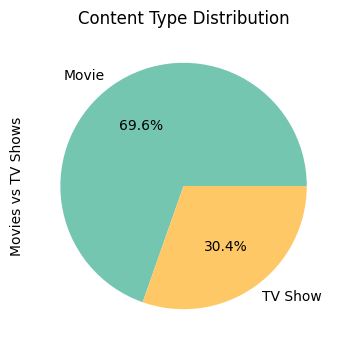

In [ ]:
# Content Type Distribution
plt.figure(figsize=(6,4))
df['type'].value_counts().plot.pie(autopct='%1.1f%%', colors=['#75C6B0','#FEC867'])
plt.title('Content Type Distribution')
plt.ylabel('Movies vs TV Shows')
plt.show()

Movies make up a slightly larger share of the catalogue than TV shows, showing Netflix's balanced focus on both types of content.

In [ ]:
# List all movies released in 2000.

movies_2000 = df[df['release_year'] == 2000]
movies_2000
for title in movies_2000['title']:
    print(title)

The Nutty Professor II: The Klumps
Space Cowboys
The Original Kings of Comedy
Charlie's Angels
Snow Day
Battlefield Earth
The Whole Nine Yards
Moesha
Rugrats in Paris: The Movie
Monty Python: Before the Flying Circus
Fiza
Phir Bhi Dil Hai Hindustani
Pokémon: Indigo League
Star Trek: Voyager
Joseph: King of Dreams
28 Days
American Psycho
An American Tail: The Treasures of Manhattan Island
Billy Elliot
Center Stage
Chal Mere Bhai
Crouching Tiger, Hidden Dragon
Dragonheart: A New Beginning
Final Destination
Hamara Dil Aapke Paas Hai
How the Grinch Stole Christmas
Kya Kehna
Little Nicky
Papa the Great
Power Rangers Lightspeed Rescue
Pukar
Scary Movie
Scream 3
The Art of War
The Flintstones in Viva Rock Vegas
What Lies Beneath
Where the Money Is


![Dancing GIF](https://24.media.tumblr.com/tumblr_me1w55td471r8bvzso1_500.gif)


/tmp/ipython-input-547680194.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres.index, y=top_genres.values, palette='viridis')


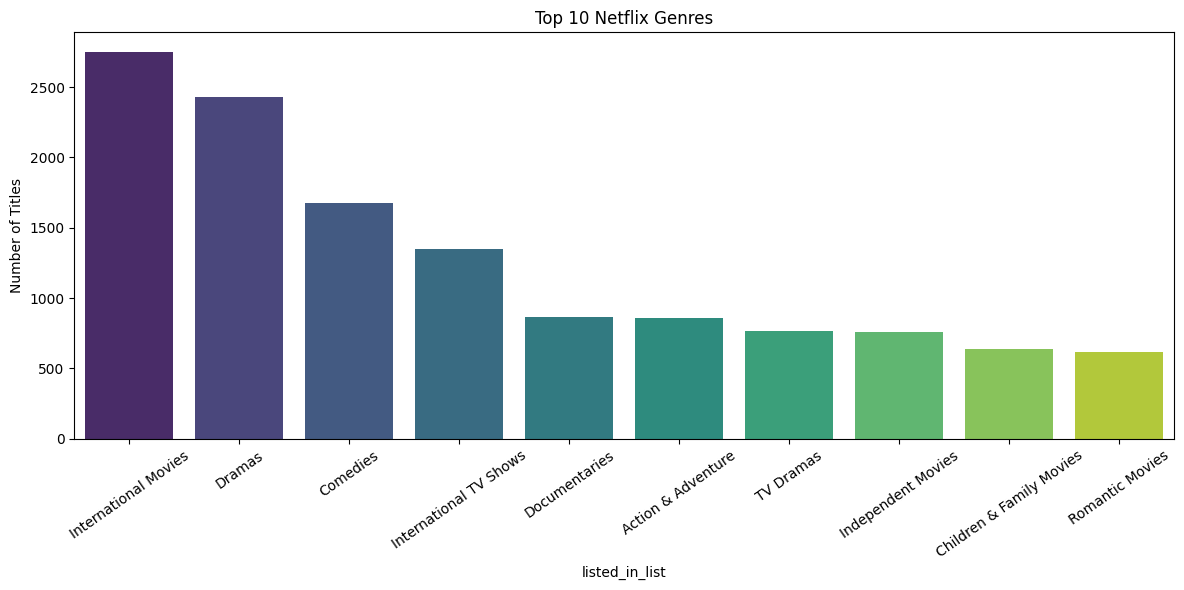

In [ ]:
# What are the top genres?

df['listed_in_list'] = df['listed_in'].str.split(',').apply(lambda x: [item.strip() for item in x])
genre_exploded = df.explode('listed_in_list')
top_genres = genre_exploded['listed_in_list'].value_counts().head(10)
plt.figure(figsize=(12,6))
sns.barplot(x=top_genres.index, y=top_genres.values, palette='viridis')
plt.title('Top 10 Netflix Genres')
plt.ylabel('Number of Titles')
plt.xticks(rotation=35)
plt.tight_layout()
plt.show()

Popular genres include Drama, Comedy, and Thriller, suggesting these attract the largest audiences; niche genres have smaller but dedicated following.This helps us understand audience preferences and content focus areas.

/tmp/ipython-input-1712828915.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.index, y=top_countries.values, palette='deep')


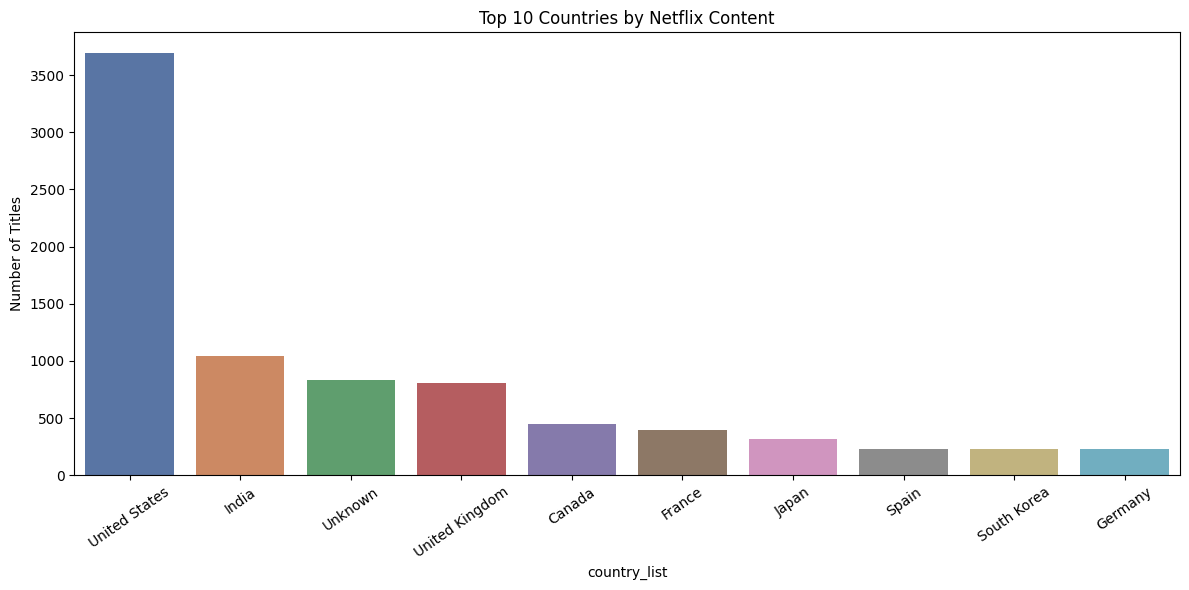

In [ ]:
# Country-wise Title Count

df['country_list'] = df['country'].fillna('').str.split(',').apply(lambda x: [item.strip() for item in x])
country_exploded = df.explode('country_list')
top_countries = country_exploded['country_list'].value_counts().head(10)
plt.figure(figsize=(12,6))
sns.barplot(x=top_countries.index, y=top_countries.values, palette='deep')
plt.title('Top 10 Countries by Netflix Content')
plt.ylabel('Number of Titles')
plt.xticks(rotation=35)
plt.tight_layout()
plt.show()

Country-wise content availability is highest in the United States, followed by several other major markets, illustrating Netflix’s global footprint and regional content licensing.

Some countries have far fewer titles, indicating opportunities for regional content growth or market expansion.


In [ ]:
# What are the titles of TV shows released in India?

Movies_In=df[(df["type"]=="TV Show") & (df["country"]=="India")]
for title in Movies_In["title"]:
    print(title)

Kota Factory
Chhota Bheem
Dharmakshetra
Raja Rasoi Aur Anya Kahaniyan
Stories by Rabindranath Tagore
The Creative Indians
Navarasa
Alma Matters
Sab Jholmaal Hai
Lava Ka Dhaava
The Big Day
Bombay Begums
Zindagi in Short
Pitta Kathalu
Mighty Little Bheem: Kite Festival
Regiment Diaries
Paava Kadhaigal
Bhaag Beanie Bhaag
Fabulous Lives of Bollywood Wives
Mismatched
Bad Boy Billionaires: India
Masaba Masaba
Little Singham
Betaal
ChuChu TV Nursery Rhymes & Kids Songs (Hindi)
Hasmukh
Akbar Birbal
Ladies Up
She
Mighty Little Bheem: Festival of Colors
Taj Mahal 1989
Jamtara - Sabka Number Ayega
Little Things
Mighty Little Bheem: Diwali
College Romance
Engineering Girls
Girls Hostel
Inmates
Bard of Blood
Typewriter
Leila
Delhi Crime
Cricket Fever: Mumbai Indians
Selection Day
GHOUL
21 Sarfarosh: Saragarhi 1897
7 (Seven)
Agent Raghav
Anjaan: Rural Myths
Anjaan: Special Crimes Unit
Badalte Rishton Ki Dastaan
Bh Se Bhade
Bhaage Re Mann
Classic Legends
Darr Sabko Lagta Hai
Devlok with Devdutt Patta

![Dancing GIF](https://www.bing.com/th/id/OGC.5b01f7e54b5f8741dbdb33dbb31a66b5?o=7&cb=ucfimg2&pid=1.7&rm=3&rurl=https%3a%2f%2fi.gifer.com%2forigin%2f41%2f4109c3f1d362403a87c5ebfd4bb382ee.gif&ehk=OLz9gUPARiuYFF9WrnsowSo1Mo6hmTlhwcjblR7gnTk%3d&ucfimg=1)


/tmp/ipython-input-62777853.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='rating', order=df['rating'].value_counts().index, palette='coolwarm')


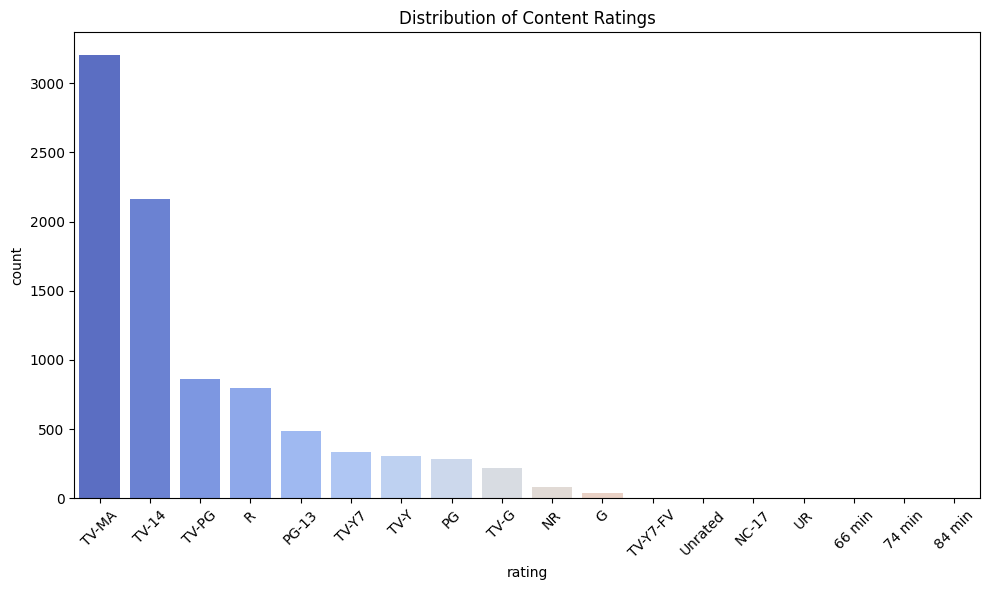

In [ ]:
#  Content Ratings Distribution

plt.figure(figsize=(10,6))
sns.countplot(data=df, x='rating', order=df['rating'].value_counts().index, palette='coolwarm')
plt.title('Distribution of Content Ratings')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The distribution of content ratings shows Netflix offers a wide range targeting diverse audiences, with many titles rated for general or teenage viewers, reflecting a family-friendly approach.



This exploratory analysis of the Netflix dataset provided valuable insights into the platform's content trends, genre preferences, audience rating distributions, and geographic availability. The project demonstrated consistent growth in Netflix's content library over the years, with a diverse range of genres catering to broad viewer interests. Country-wise analysis revealed varying content availability, highlighting Netflix's regional market strategies and opportunities for expansion. Overall, this analysis not only enhances the understanding of Netflix's content ecosystem but also lays a strong foundation for future work such as recommendation systems and targeted content production. The project showcased the power of data cleaning, visualization, and interpretation to extract meaningful patterns from complex datasets, making it an essential step toward data-driven decision-making in the streaming industry.


![Dancing GIF](https://www.bing.com/th/id/OGC.7ae0c0ca5c1d6690ab4b691987a1df1a?o=7&cb=ucfimg2&pid=1.7&rm=3&rurl=https%3a%2f%2fmedia.giphy.com%2fmedia%2f11TemCEltpAfrG%2fgiphy.gif&ehk=k8fOAmsAxWUJBzXkUN43%2b%2fhDHYryIECj3OySW4smXB8%3d&ucfimg=1)
